# Light Curve 

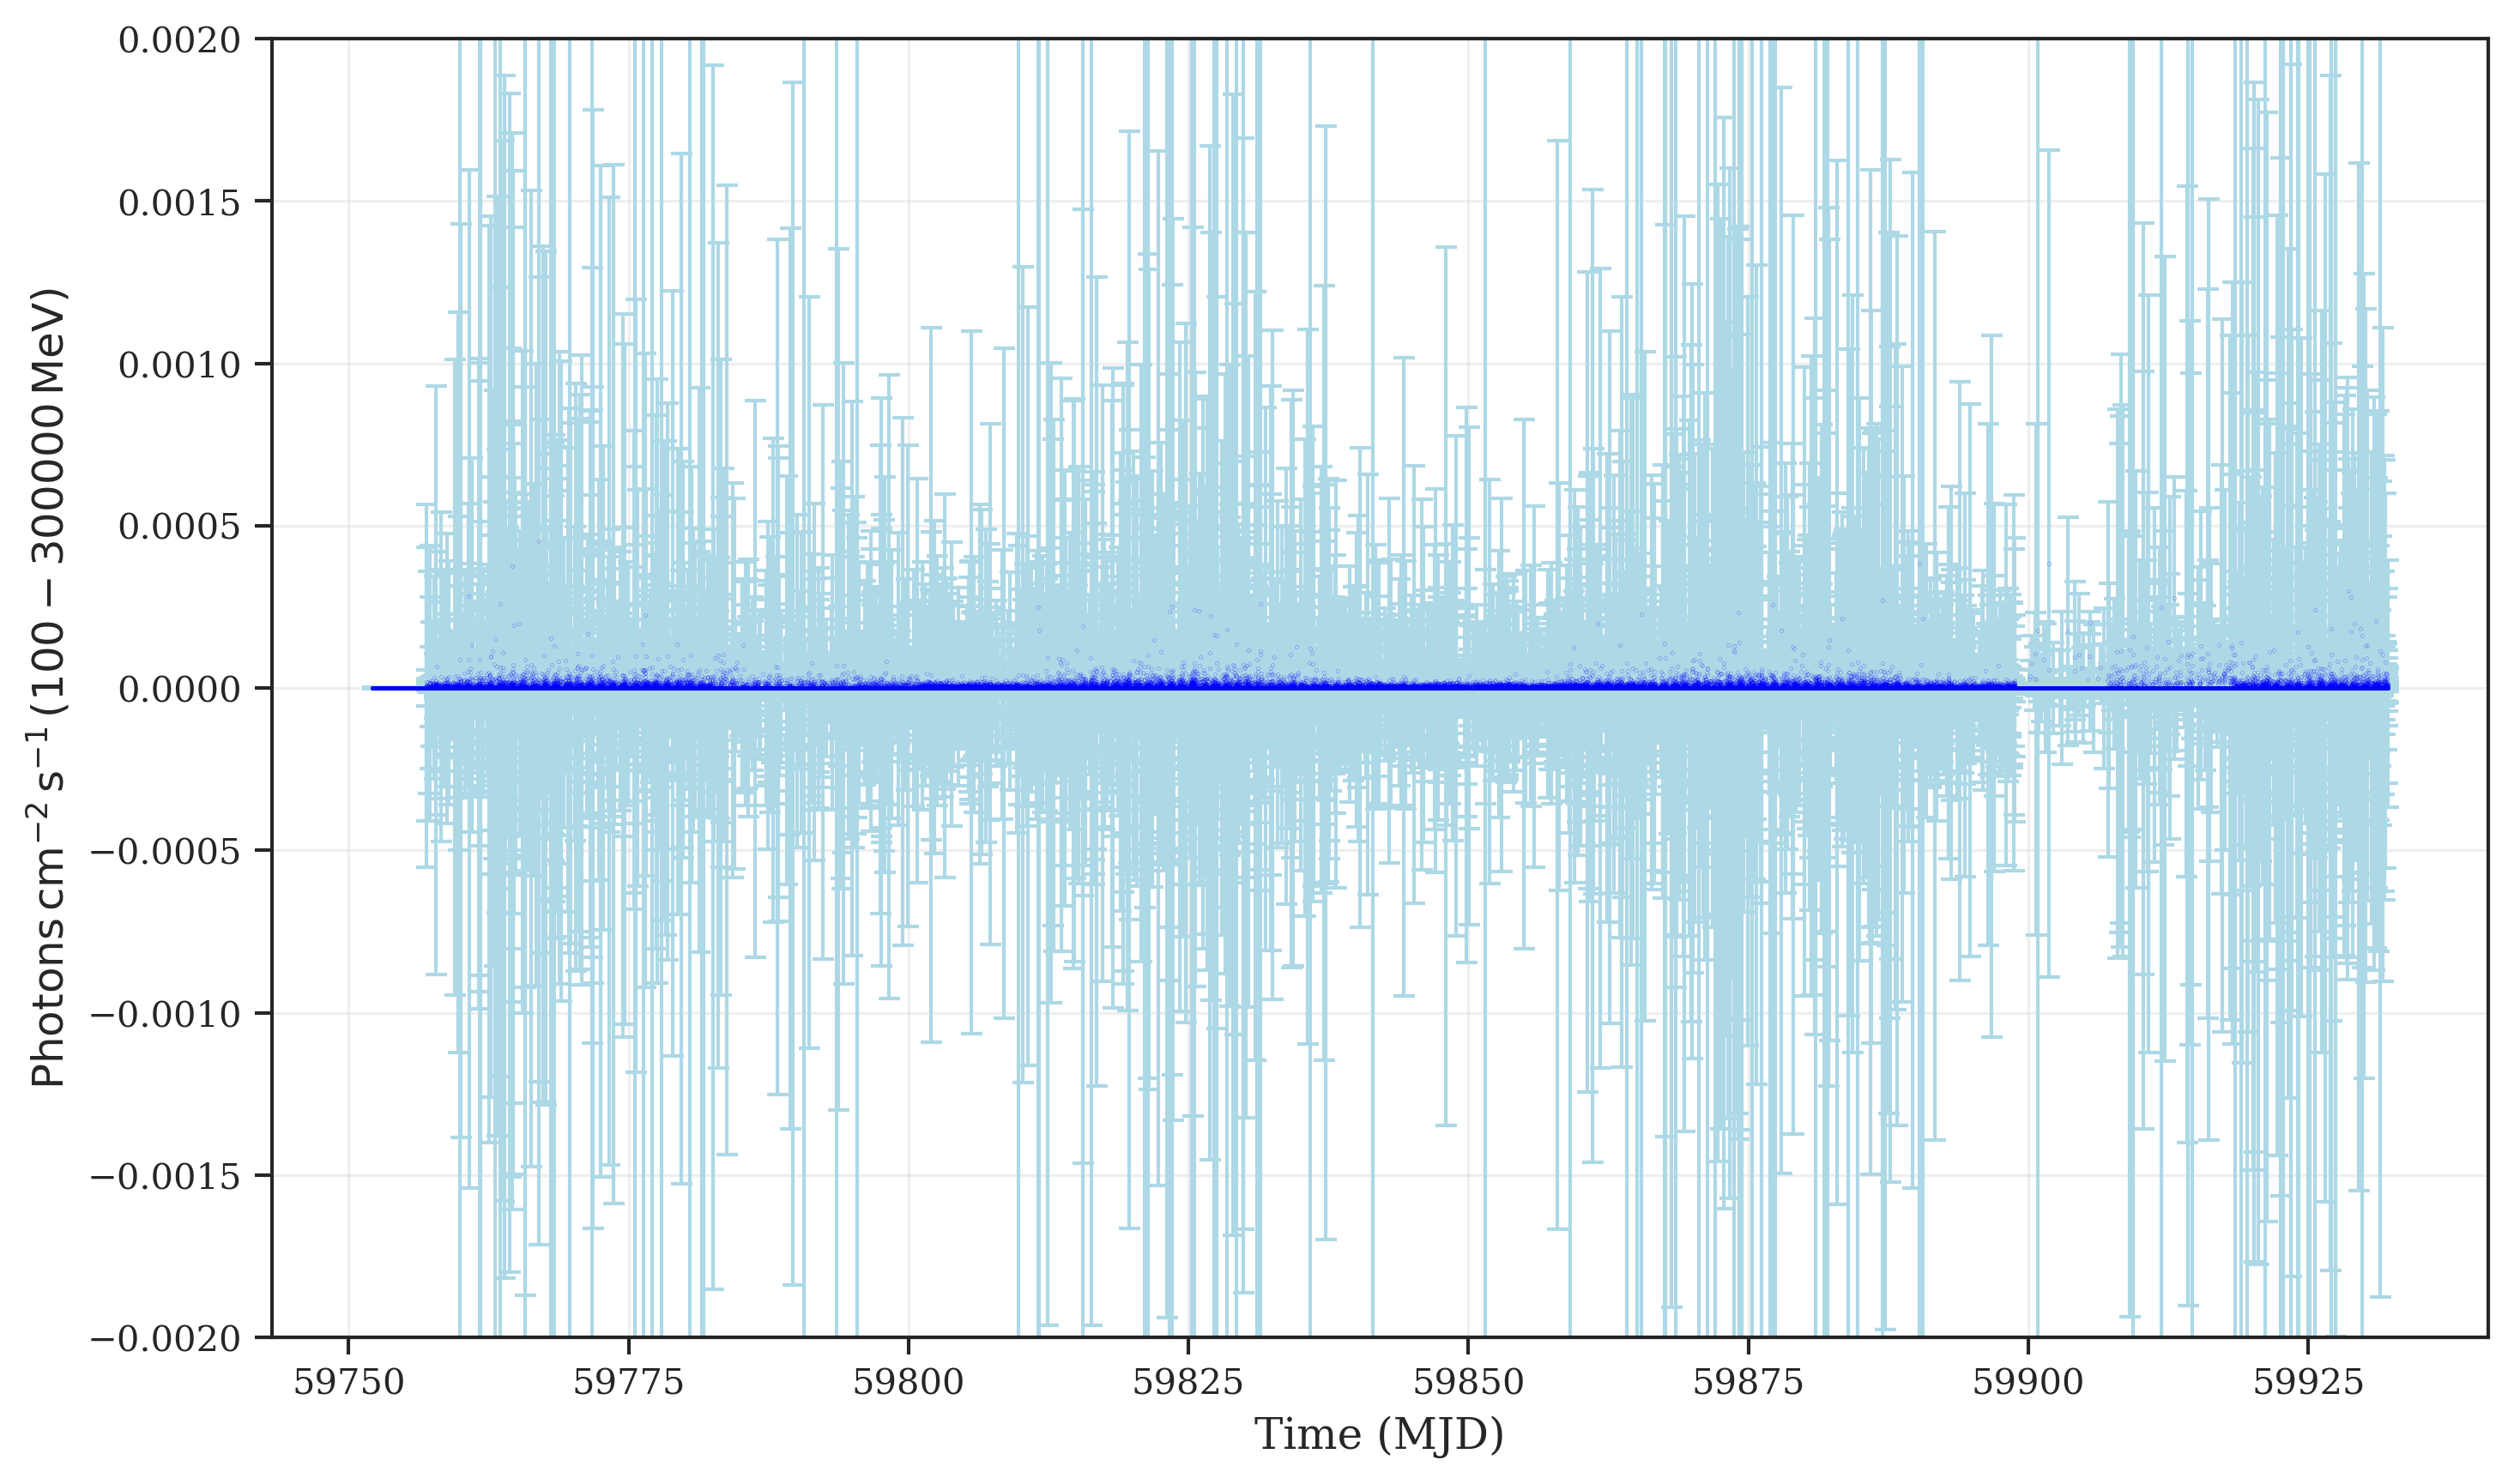

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Configuración avanzada de Seaborn y Matplotlib
sns.set_context("paper", font_scale=1.5)  # Ajuste de tamaño de fuente para publicaciones
sns.set_style("ticks")  # Estilo limpio con ticks visibles
sns.set_palette("muted")  # Paleta de colores suave y profesional

# Configuración adicional de Matplotlib
plt.rcParams.update({
    "axes.titlesize": 14,      # Tamaño de los títulos de los ejes
    "axes.labelsize": 12,      # Tamaño de las etiquetas de los ejes
    "xtick.labelsize": 10,     # Tamaño de las etiquetas del eje X
    "ytick.labelsize": 10,     # Tamaño de las etiquetas del eje Y
    "legend.fontsize": 10,     # Tamaño de la leyenda
    "font.family": "serif",    # Tipo de fuente: preferido en publicaciones científicas
    "figure.dpi": 300,         # Resolución de la figura
    "savefig.dpi": 300,        # Resolución de exportación
    "figure.figsize": (20, 6), # Tamaño de la figura (ajustado)
    "axes.grid": True,         # Activar cuadrícula
    "grid.alpha": 0.3,         # Transparencia de la cuadrícula
    "lines.linewidth": 2,      # Grosor de las líneas
})


# Configuración de Seaborn
#sns.set(style='darkgrid')

# Cargar los datos desde el archivo
data = np.loadtxt('sagA-clean-gamma.dat')

# Extraer columnas
mjd = data[:, 0]  # MJD
flux = data[:, 1]  # Flujo
error = data[:, 2]  # Error

# Crear el plot
plt.figure(figsize=(10, 6))
plt.errorbar(mjd, flux, yerr=error, fmt='.', color='blue', 
             ecolor='lightblue', elinewidth=1, capsize=3, markersize=.1)
# plt.title('Flujo de Photones ($\mathrm{cm^{-2} \, s^{-1}}$)')
plt.xlabel('Time (MJD)')
plt.ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')
plt.ylim(-.002,.002)
plt.grid(True)
# plt.legend()
plt.tight_layout()

# Mostrar el plot
plt.savefig("images/sagA-gamma-clean-lc.pdf", format='pdf', bbox_inches="tight", dpi=300)
plt.show()


/home/wattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

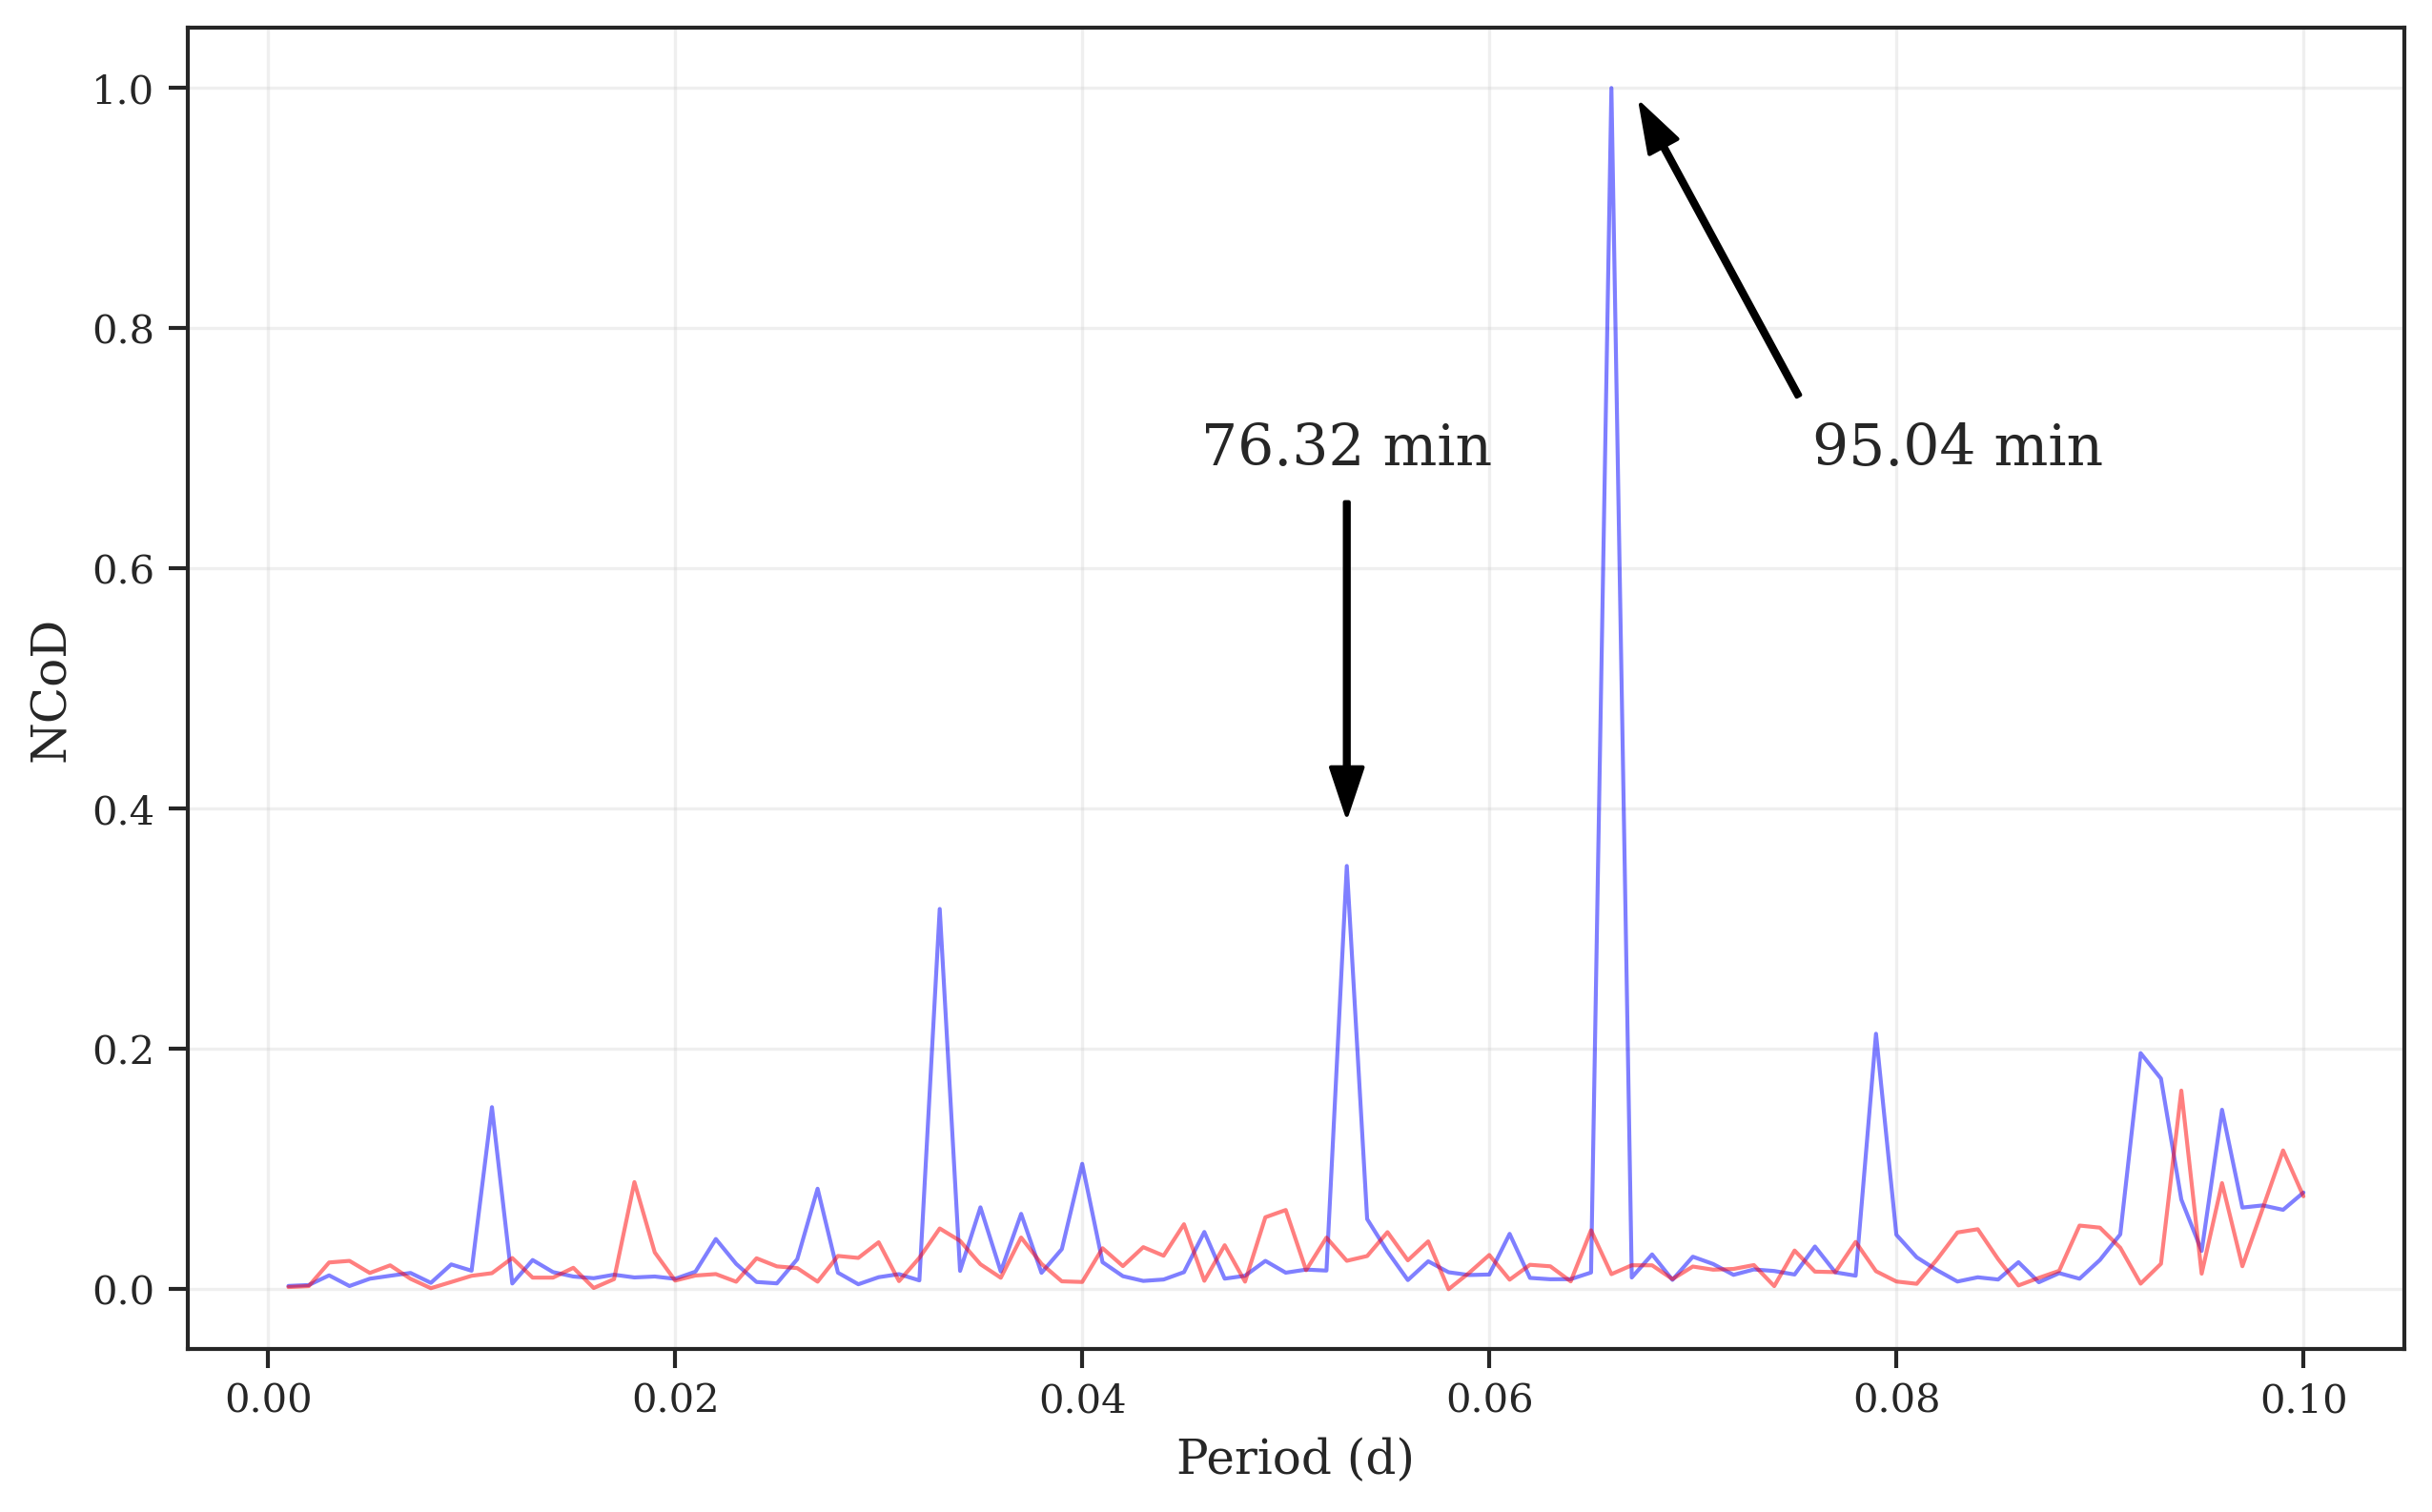

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Configuración avanzada de Seaborn y Matplotlib
sns.set_context("paper", font_scale=1.5)  # Ajuste de tamaño de fuente para publicaciones
sns.set_style("ticks")  # Estilo limpio con ticks visibles
sns.set_palette("muted")  # Paleta de colores suave y profesional

# Configuración adicional de Matplotlib
plt.rcParams.update({
    "axes.titlesize": 14,      # Tamaño de los títulos de los ejes
    "axes.labelsize": 12,      # Tamaño de las etiquetas de los ejes
    "xtick.labelsize": 10,     # Tamaño de las etiquetas del eje X
    "ytick.labelsize": 10,     # Tamaño de las etiquetas del eje Y
    "legend.fontsize": 10,     # Tamaño de la leyenda
    "font.family": "serif",    # Tipo de fuente: preferido en publicaciones científicas
    "figure.dpi": 300,         # Resolución de la figura
    "savefig.dpi": 300,        # Resolución de exportación
    "figure.figsize": (10, 6), # Tamaño de la figura (ajustado)
    "axes.grid": True,         # Activar cuadrícula
    "grid.alpha": 0.3,         # Transparencia de la cuadrícula
    "lines.linewidth": 2,      # Grosor de las líneas
})



# Cargar los datos de ambos archivos
data_rp = np.loadtxt('sagA-gamma-rp-norm.dat')
data_wf = np.loadtxt('sagA-gamma-wf-norm.dat')

# Normalizar la primera columna dividiéndola por 1000
mjd_rp = data_rp[:, 0] / 1000
flux_rp = data_rp[:, 1]

mjd_wf = data_wf[:, 0] / 1000
flux_wf = data_wf[:, 1]

# Crear un DataFrame de pandas para cada conjunto de datos
df_rp = pd.DataFrame({'MJD': mjd_rp, 'Flux': flux_rp})
df_wf = pd.DataFrame({'MJD': mjd_wf, 'Flux': flux_wf})


# Crear el plot
#plt.figure(figsize=(10, 6))

# Trazar la línea para el archivo RP
sns.lineplot(x='MJD', y='Flux', data=df_rp, color='blue',linewidth=1, alpha=0.5)

# Trazar la línea para el archivo WF
sns.lineplot(x='MJD', y='Flux', data=df_wf, color='red',linewidth=1, alpha=0.5)


plt.annotate(
    '76.32 min',  # Text to display
    xy=(0.053, 0.38),  # Coordinates for the arrow's endpoint
    xytext=(0.053, 0.7),  # Adjusted position of the text, closer to the arrow start
    ha='center',  # Horizontally align text in the center
    va='center',  # Vertically align text in the center
    arrowprops=dict(facecolor='black', edgecolor='black', shrink=0.05, width=1, headwidth=8, lw=1)
)



# Añadir una flecha con un número apuntando a una coordenada específica
plt.annotate(
    '95.04 min',  # El número que quieres mostrar
    xy=(0.067, 1),  # Coordenadas de la flecha
    xytext=(0.083, 0.7),  # Posición del texto
    ha='center',  # Horizontally align text in the center
    va='center',  # Vertically align text in the center
    arrowprops=dict(facecolor='black', edgecolor='black', shrink=0.05, width=1, headwidth=8, lw=1)
)

# Configurar el título y las etiquetas
# plt.title('Flujo Normalizado para SagA Gamma (RP y WF)')
plt.xlabel('Period (d)')
plt.ylabel('NCoD')
#plt.legend()
# plt.tight_layout()
plt.savefig("images/sag-gamma-rp-wf.pdf", format='pdf', bbox_inches="tight", dpi=300)
# Mostrar el plot
plt.show()
